<a href="https://colab.research.google.com/github/yojulab/learn_data_analytics/blob/main/codes/cases/CDA_singleVariableTest_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### refer url : https://blog.naver.com/data_station/222493268636

- CDA (확증적 데이터 분석) : 통계적 가설검정 기법
- P.value (확률값) 를 통해 가설이 참인지 거짓인지 확인하는 분석기법

- **통계적 가설 검정**
- 귀무가설 : 대립가설의 반대가설 (보통가설 / 일반적 상태)
- 대립가설 : 내가 의심하는 상태 / 내가 규명하고자 하는 가설

- P.value (확률값) : 귀무가설이 참일 확률 (0 ~ 1)
- 유의 수준 : 가설검정 판단의 기준 (0.05)
    - P.value > 0.05 : 귀무가설 참 (귀무가설기각실패)
    - P.value < 0.05 : 대립가설 참 (귀무가설기각)

- Ex) 고객 성별에 따라서 매출액에 차이가 있는가?
     - 귀무가설 : 고객 성별에 따른 매출액의 평균 차이가 없을 것이다.
     - 대립가설 : 고객 성별에 따른 매출액의 평균 차이가 있을 것이다.
     - Two T - Test -> P.value 0.03
     - P.value < 0.05 : 귀무가설기각 (대립가설 참)
     - 고객 성별에 따른 매출액의 평균 차이가 있을 것이다.

- 단일변수
    - 연속형 : 정규성 검정 / One Sample T Test (1표본 평균 검정)
    - 범주형 : 비율 검정
- 다변수
    - X 범주형 / Y 연속형 : Two Sample T Test / 등분산 검정 ... (Y가 정규분포)
                            비모수적 검정 (Y가 비정규분포)
    - X 범주형 / Y 범주형 : Chi Square Test  
    - X 연속형 / Y 연속형 : 상관분석 / 회귀분석
    - X 연속형 / Y 범주형 : Logistic 분석

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('delivery_log.csv')
df1.head()

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


In [10]:
df1.describe(include=object)

,결제수단,배송번호,배송시작일,배송완료일,주문경로
count,46749,46749,46749,46749,46749
unique,44,37691,1548,2559,3
top,무통장입금,D-20180316-0000178-00,2018-12-19 오후 5:36,2019-02-02 오전 5:32,PC쇼핑몰
freq,24171,7,388,547,25695


In [ ]:
# df1['배송시작일_datatime'] = df1['배송시작일'].to_

In [ ]:
import seaborn as sns
import matplotlib as mpl

mpl.rc('font',family='Malgun Gothic')

<AxesSubplot:xlabel='상품구매금액', ylabel='Count'>

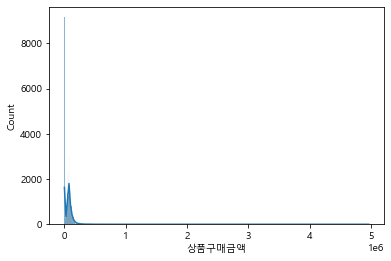

In [ ]:
sns.histplot(data=df1, x='상품구매금액', kde=True)

In [ ]:
import scipy.stats as stats

In [ ]:
# 귀무가설 : 해당 연속형 데이터 분포는 정규분포이다.
# 대립가설 : 해당 연속형 데이터 분포는 정규분포를 띄지 않을 것이다.
stats.normaltest(df1['상품구매금액'])

NormaltestResult(statistic=86347.36471094817, pvalue=0.0)

In [ ]:
# P.value 0.0 < 0.05 (귀무가설기각, 대립가설 참)
# 해당 연속형 데이터 분포는 정규분포를 띄지 않을 것이다.

In [ ]:
df2 = pd.read_csv('Data03.csv')
df2.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


<AxesSubplot:xlabel='age', ylabel='Count'>

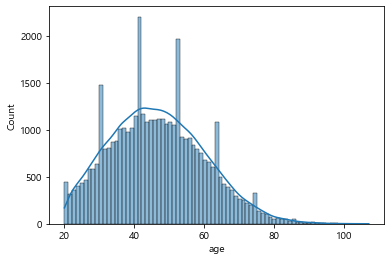

In [ ]:
sns.histplot(data=df2, x='age',kde=True)

In [ ]:
# 귀무가설 : age 데이터는 정규분포를 띌것이다.
# 대립가설 : age 데이터는 정규분포를 띄지 않을것이다.
stats.normaltest( df2['age'].dropna() )

NormaltestResult(statistic=808.6960154009449, pvalue=2.476803125887823e-176)

In [ ]:
# P.value < 0.05 (대립가설 참) / age 데이터는 정규분포를 띄지 않는다.